## Exercise 1: Structuring a given code

### original

In [20]:
file_path = input("Enter the path to the CSV file: ")
records = []
with open(file_path, 'r') as file:
    csv_reader = csv.DictReader(file)
    for row in csv_reader:
        records.append(row)

total = sum(float(record['Grade']) for record in records)
average = total / len(records)

print(f"Average Grade: {average}")
print("--------------------")

filtered_records = [record for record in records if float(record['Grade']) >= 80.0]

print("Student Report")
print("--------------")
for record in filtered_records:
    print(f"Name: {record['Name']}")
    print(f"Grade: {record['Grade']}")
    print("--------------------")


FileNotFoundError: [Errno 2] No such file or directory: ''

### changed

In [ ]:
#code used to load in the csv file
file_path = input("Enter the path to the CSV file: ")
records = []
with open(file_path, 'r') as file:
    csv_reader = csv.DictReader(file)
    for row in csv_reader:
        records.append(row)

#this function return the average grade of all students from the inputted list
def avg_grade(inpt):
    total = sum(float(record['Grade']) for record in inpt)
    return total / len(records)

def avg_grade_print(inpt):
    print(f"Average Grade: {inpt}")
    print("--------------------")

#this function return a list of all students who achieved a grade higher that 80.0
def starstudents(inpt):
    return [item for item in inpt if float(item['Grade']) >= 80.0]

#this function prints the name and grade of all student in the input list
def student_report_print(inpt):
    print("Student Report")
    print("--------------")
    for record in inpt:
        print(f"Name: {record['Name']}")
        print(f"Grade: {record['Grade']}")
        print("--------------------")

#the part of the code that caused the desired values in the records to be found
filtered_records = starstudents(records)
average = avg_grade(records)

#prints the desired values
avg_grade_print(average)
student_report_print(filtered_records)



## Exercise 2: Mandelbrot visualisation

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches

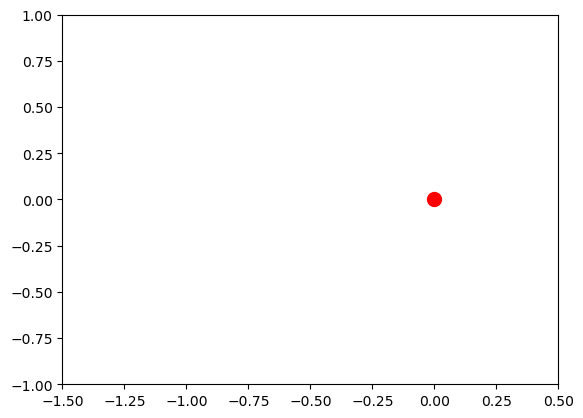

In [46]:
#this function makes a mandelbroth set with n amount of iterations using the complex value x+yj (n,x,y)
def mandelbroth(n,x,y):
    c = complex(x,y)
    a=np.array([0])
    for i in range(n):
        a=np.append(a,a[i]**2+c)
    return a
#this function takes a numpy array of complex numbers and puts these in a matplotlib.pyplot plot
def plot_complex(inpt):
    plt.plot(inpt.real, inpt.imag, 'o', color = 'red', markersize = 10)
    plt.xlim([-1.5,0.5])
    plt.ylim([-1,1])
#end of defining functions begining in inputing values
plot_complex(mandelbroth(10,1,1))
#this is wrong probably


## Exercise 3: Google PageRank algorithm and the worldwide web